TODO:TidyingDemo
* Most common words - minus stop words
* word clouds
* processing for word clouds - stop words, stemming, lowercasing etc

In [91]:
# TODO ADD NICE VISUALIZATION DEFUALTS

# Twarc Tidying and Analysis
This notebook will cover the exploration, tidying up and some basic analysis of the data collected by the TwarcDemo in this repo(TODO: Link)

We will be using the 100 Vegan Tweets from "Veganuary" 2019. So let's import some packages and read it in.

In [92]:
import pandas as pd # Our data manipulation library
import numpy as np # Support for matrices, and other table-like shapes

In [93]:
# Read our data into a dataframe using pandas
data = pd.read_csv('data/100VeganLondonJan2019.csv')

# The head function prints out the first 5 rows.
data.head()

,id,created_at,text,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,...,reply_settings,source,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 93
0,1081701878147280897,2019-01-05T23:59:59.000Z,Buffalo tempeh and cauliflower bites w vegan r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Instagram,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
1,1081701595333697536,2019-01-05T23:58:52.000Z,Irregular reminder that some millennials are n...,"[{""width"": 680, ""type"": ""photo"", ""media_key"": ...","[""3_1081701592494231552""]",NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for Android,NaN,NaN,NaN,retweeted,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
2,1081701876788350977,2019-01-05T23:59:59.000Z,RT @thalestral: Irregular reminder that some m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for Android,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
3,1081701870110953472,2019-01-05T23:59:57.000Z,@pritchardswyd Just watched #DirtyVegan I'm so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for Android,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
4,1081545304908984320,2019-01-05T13:37:49.000Z,The fuckwits that like to call you a 'snowflak...,[{}],"[""3_1081545295727681537""]",NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for Android,NaN,NaN,NaN,retweeted,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN


We can actuall test our tweets are real by taking the ID from the first column and replacing the ID in any tweet we can find, which I will demo!

So we've got our data read in successfully, let's print out some of the tweet text to make sure they have something to do with veganism.

In [94]:
for index in [1,2,3,4,5]:
    print(data['text'][index])
    print('\n')


Irregular reminder that some millennials are nearly 40.\n\nThe term you are grasping for is Generation Z.\n\nBut you're still a) wrong and b) the full embodiment of "angry old man shouts at vegan sausage rolls". https://t.co/eoeJseYNop


RT @thalestral: Irregular reminder that some millennials are nearly 40.\n\nThe term you are grasping for is Generation Z.\n\nBut you're still a…


@pritchardswyd Just watched #DirtyVegan I'm so happy. A famous Welsh #vegan athlete/chef. 🏴󠁧󠁢󠁷󠁬󠁳󠁿 can't wait for the next episode 😀


The fuckwits that like to call you a 'snowflake' are blockading a Gregg's in Manchester for selling vegan sausage rolls. https://t.co/3snFD8wupE


RT @MikeStuchbery_: The fuckwits that like to call you a 'snowflake' are blockading a Gregg's in Manchester for selling vegan sausage rolls…




In [95]:
# I always recommend running info() for basic type information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 94 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               289 non-null    int64  
 1   created_at                                       289 non-null    object 
 2   text                                             289 non-null    object 
 3   attachments.media                                68 non-null     object 
 4   attachments.media_keys                           68 non-null     object 
 5   attachments.poll.duration_minutes                0 non-null      float64
 6   attachments.poll.end_datetime                    0 non-null      float64
 7   attachments.poll.id                              0 non-null      float64
 8   attachments.poll.options                         0 non-null      float64
 9   attachments.poll.voting_status  

In [96]:
# and decribe() for statistical info.
data.describe()

,id,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.entities.description.cashtags,author.pinned_tweet_id,...,in_reply_to_user.withheld.country_codes,in_reply_to_user_id,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,withheld.scope,withheld.copyright,withheld.country_codes,Unnamed: 93
count,2.890000e+02,0.0,0.0,0.0,0.0,0.0,0.0,2.890000e+02,0.0,1.770000e+02,...,0.0,4.600000e+01,289.000000,289.000000,289.000000,289.000000,0.0,0.0,0.0,0.0
mean,1.081578e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.843356e+17,NaN,1.215124e+18,...,NaN,1.419273e+17,1144.903114,75.979239,64.577855,500.217993,NaN,NaN,NaN,NaN
std,5.311967e+14,NaN,NaN,NaN,NaN,NaN,NaN,3.718847e+17,NaN,2.139107e+17,...,NaN,3.410535e+17,9037.334411,678.213375,529.417318,2116.187074,NaN,NaN,NaN,NaN
min,1.074786e+18,NaN,NaN,NaN,NaN,NaN,NaN,6.043582e+06,NaN,4.834671e+17,...,NaN,1.441451e+07,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1.081687e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.106772e+08,NaN,1.082788e+18,...,NaN,4.522361e+07,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,1.081701e+18,NaN,NaN,NaN,NaN,NaN,NaN,9.680329e+08,NaN,1.284414e+18,...,NaN,1.848804e+08,0.000000,0.000000,0.000000,7.000000,NaN,NaN,NaN,NaN
75%,1.081701e+18,NaN,NaN,NaN,NaN,NaN,NaN,3.208025e+09,NaN,1.406689e+18,...,NaN,2.391254e+09,8.000000,0.000000,1.000000,71.000000,NaN,NaN,NaN,NaN
max,1.081702e+18,NaN,NaN,NaN,NaN,NaN,NaN,1.081436e+18,NaN,1.447887e+18,...,NaN,1.045339e+18,142869.000000,9755.000000,8097.000000,22950.000000,NaN,NaN,NaN,NaN


At this point I am thinking we have too many columns to analyse really. It's worth at this point asking if there is anything we could remove now. Though if we are exploring this may be premature.

So that looks good to me, We might notice there are some retweets in here. I personally prefer removing retweets and replies where possible as they complicate our analysis with duplicate and tweets that don't make sense in context.

## Removing retweets and replies.
We need a way of detecting these. You might notice retweets start with two "RT" retweet characters. There is also a column that might help. let's check out the type column.

We can call the value_counts function on any column.

In [97]:
data['type'].value_counts()

retweeted     76
replied_to    25
quoted         2
Name: type, dtype: int64

<AxesSubplot:>

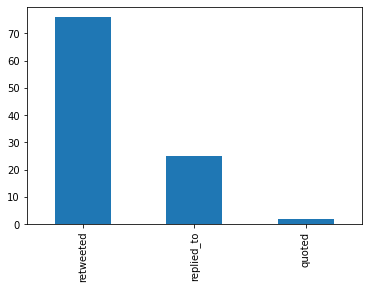

In [98]:
# We can also quickly call a plot function on any of these generated dataframes or value_counts.
data['type'].value_counts().plot(kind='bar')

# Though we are missing lots of Tweets here

In [99]:
# Regular tweets have a type "null"
# We can use boolean indexing to select only the rows that match this null condition.
len(data[data['type'].isnull()])

186

In [100]:
# so lets select all the tweets that are typed as null.
data = data[data['type'].isnull()]
len(data)

186

In [101]:
# the length is correct but lets check things look okay
data.head()

,id,created_at,text,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,...,reply_settings,source,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 93
0,1081701878147280897,2019-01-05T23:59:59.000Z,Buffalo tempeh and cauliflower bites w vegan r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Instagram,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
2,1081701876788350977,2019-01-05T23:59:59.000Z,RT @thalestral: Irregular reminder that some m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for Android,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
3,1081701870110953472,2019-01-05T23:59:57.000Z,@pritchardswyd Just watched #DirtyVegan I'm so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for Android,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
5,1081701866843660289,2019-01-05T23:59:56.000Z,RT @MikeStuchbery_: The fuckwits that like to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for iPhone,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN
7,1081701855707713536,2019-01-05T23:59:54.000Z,@Grady Be Vegan 🌱,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,everyone,Twitter for iPhone,NaN,NaN,NaN,NaN,2021-10-13T15:59:31+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.7.3,NaN


In [102]:
# We need to reindex as well
data = data.reset_index()
# and delete old index
del data['index']

In [103]:
# lets check the first five tweets again
for index in [1,2,3,4,5]:
    print(data['text'][index])
    print('\n')

RT @thalestral: Irregular reminder that some millennials are nearly 40.\n\nThe term you are grasping for is Generation Z.\n\nBut you're still a…


@pritchardswyd Just watched #DirtyVegan I'm so happy. A famous Welsh #vegan athlete/chef. 🏴󠁧󠁢󠁷󠁬󠁳󠁿 can't wait for the next episode 😀


RT @MikeStuchbery_: The fuckwits that like to call you a 'snowflake' are blockading a Gregg's in Manchester for selling vegan sausage rolls…


@Grady Be Vegan 🌱


Me: why don’t we go to this nice restaurant that’s vegan and very highly rated.\n\nMy family: let’s go to rib crib.




Annoyingly removing tweets marked with type retweet doesn't seem to get them all. This is one of those many things with the Twitter API I can't seem to find an answer to.

Luckily they are prepended with RT, which we can scrape an remove.

In [104]:
# remove tweets with RT string
data = data[~data['text'].str.contains('RT')]

In [105]:
# again, reset index and let's test again.
data = data.reset_index()

del data['index']

# lets check the first five tweets again
for index in [1,2,3,4,5]:
    print(data['text'][index])
    print('\n')

@pritchardswyd Just watched #DirtyVegan I'm so happy. A famous Welsh #vegan athlete/chef. 🏴󠁧󠁢󠁷󠁬󠁳󠁿 can't wait for the next episode 😀


@Grady Be Vegan 🌱


Me: why don’t we go to this nice restaurant that’s vegan and very highly rated.\n\nMy family: let’s go to rib crib.


@amyythevegan @happyhelen94 Genuine question. Do vegan products have to be delivered by vegan drivers? Like, without leather jackets or shoes?\n\nI'm not after a debate, I'm merely curious as to how far veganism goes. Thanks for your time!


@Vegan_Rey I gotta go back




At this point it's probably time to narrow down what we are doing, there is too much interesting information in this dataset.

I am going to keep the following:
* id - The Tweet ID
* created_at - The time the tweet was created
* text - the text that makes up a tweet
* author.id - the author ID
* author.created_at - when the users account was created
* author.username - the Twitter users username
* author.location - a self-defined location
* author.public_metrics.followers_count - Number of followers a user has
* geo.full_name - the full name describing a tweets geolocation
* public_metrics.like_count - number of likes on this tweet
* public_metrics.retweet_count - number of retweets on this tweer.

In [107]:
data = data[['id','created_at', 'text','author.id','author.created_at', 'author.username','author.location','author.public_metrics.followers_count','geo.full_name','public_metrics.like_count','public_metrics.retweet_count']]
data.head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count
0,1081701878147280897,2019-01-05T23:59:59.000Z,Buffalo tempeh and cauliflower bites w vegan r...,88263960,2009-11-07T20:28:23.000Z,RunCrissieRun,Virginia,1349,NaN,1,1
1,1081701870110953472,2019-01-05T23:59:57.000Z,@pritchardswyd Just watched #DirtyVegan I'm so...,918886868,2012-11-01T12:15:01.000Z,busyworker99,UK,10708,NaN,2,0
2,1081701855707713536,2019-01-05T23:59:54.000Z,@Grady Be Vegan 🌱,1004709827015213056,2018-06-07T13:01:04.000Z,taylorwatkins03,"Indianapolis, IN",127,NaN,0,0
3,1081701855426723840,2019-01-05T23:59:54.000Z,Me: why don’t we go to this nice restaurant th...,1401405102,2013-05-04T04:54:06.000Z,jaunsin,USA,881,NaN,7,2
4,1081701849642819584,2019-01-05T23:59:52.000Z,@amyythevegan @happyhelen94 Genuine question. ...,2385669354,2014-03-12T18:51:59.000Z,GriffLemon,"Wigan, Lancashire",750,NaN,1,0


## TODO Does the perception of Veganism change over time?
Next let's sort this dataframe by date. Looking now we seem to have only a handful of minutes between our Tweets.

In [108]:
# TODO: sort by date seems to work for days, but not minutes and seconds?
# sort by date
# convert created at into a datetime object
data['created_at'] =pd.to_datetime(data.created_at)
# Sort our dataframe b dates
data.sort_values(by='created_at')
# reset index
data = data.reset_index()
del data['index']

# print the head
data.head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count
0,1081701878147280897,2019-01-05 23:59:59+00:00,Buffalo tempeh and cauliflower bites w vegan r...,88263960,2009-11-07T20:28:23.000Z,RunCrissieRun,Virginia,1349,NaN,1,1
1,1081701870110953472,2019-01-05 23:59:57+00:00,@pritchardswyd Just watched #DirtyVegan I'm so...,918886868,2012-11-01T12:15:01.000Z,busyworker99,UK,10708,NaN,2,0
2,1081701855707713536,2019-01-05 23:59:54+00:00,@Grady Be Vegan 🌱,1004709827015213056,2018-06-07T13:01:04.000Z,taylorwatkins03,"Indianapolis, IN",127,NaN,0,0
3,1081701855426723840,2019-01-05 23:59:54+00:00,Me: why don’t we go to this nice restaurant th...,1401405102,2013-05-04T04:54:06.000Z,jaunsin,USA,881,NaN,7,2
4,1081701849642819584,2019-01-05 23:59:52+00:00,@amyythevegan @happyhelen94 Genuine question. ...,2385669354,2014-03-12T18:51:59.000Z,GriffLemon,"Wigan, Lancashire",750,NaN,1,0


In [109]:
data.tail()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count
78,1081700492768669696,2019-01-05 23:54:29+00:00,@manytypesoftea These vegan sausages have sort...,166945488,2010-07-15T11:12:51.000Z,MaryWL1,NaN,731,NaN,0,0
79,1081700473650835456,2019-01-05 23:54:24+00:00,@Vegan_Earper_ 😱 that’s fucking awesome! How d...,1045339314198986752,2018-09-27T15:48:08.000Z,KdWool_11,My ❤️ is in Graz,723,NaN,1,0
80,1081700462007668736,2019-01-05 23:54:21+00:00,Boris Johnson medium rare\n\nFarage with carro...,890161909089140736,2017-07-26T10:48:32.000Z,YouGetItRight,"London, England",1268,NaN,0,0
81,1081700455988805641,2019-01-05 23:54:20+00:00,"@elyxandra Weird. Liquid smoke is vegan, so I ...",51742092,2009-06-28T14:30:37.000Z,LiciaRei,"Crystal Palace, The Moon",8381,NaN,2,0
82,1081700455422537728,2019-01-05 23:54:20+00:00,Check out my first meal on my new blog! Also t...,1067364926476492800,2018-11-27T10:30:03.000Z,TomsTastes,NaN,0,NaN,0,0


## How is Veganism percieved on Twitter?
In order to answer this question we need to introduce sentiment analysis. This is quite easy to do in Python as complicated as it sounds. As with many complicated things, somebody has written a package to make this easy for us.


In [111]:
# Import NLTK, the Natural Language package
import nltk
# Download the popular vader lexicon of words and sentiments.
nltk.download([
    "vader_lexicon",
])

# import the sentiment analyser.
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a new sentiment analyser.
sia = SentimentIntensityAnalyzer()

# And write a function we can pass to our pandas function
def get_sentiment(string):
    return sia.polarity_scores(string)['compound']

[nltk_data] <urlopen error [Errno 8] nodename nor servname provided,
[nltk_data]     or not known>


With this package our sentiment scores are returned on a scale of -1 for fully negative, to +1 for fully positive.
So our below sentence "I love cats" has a sentiment of 0.6, we high positive sentiment. Whereas "I hate cats is lower in sentiment.

In [112]:
# Test our sentiment package
get_sentiment('I love cats')

0.6369

In [113]:
# Test our sentiment package
get_sentiment('I hate cats')

-0.5719

In [121]:
# So let's apply this to our entire dataframe
data['sentiment'] = data['text'].apply(get_sentiment)

# print a few rows
for index in [1,2,3,4,5]:
    print('sentiment ' + str(data['sentiment'][index]))
    print(data['text'][index])
    print('\n')

sentiment 0.6948
@pritchardswyd Just watched #DirtyVegan I'm so happy. A famous Welsh #vegan athlete/chef. 🏴󠁧󠁢󠁷󠁬󠁳󠁿 can't wait for the next episode 😀


sentiment 0.0
@Grady Be Vegan 🌱


sentiment 0.5023
Me: why don’t we go to this nice restaurant that’s vegan and very highly rated.\n\nMy family: let’s go to rib crib.


sentiment 0.8101
@amyythevegan @happyhelen94 Genuine question. Do vegan products have to be delivered by vegan drivers? Like, without leather jackets or shoes?\n\nI'm not after a debate, I'm merely curious as to how far veganism goes. Thanks for your time!


sentiment 0.0
@Vegan_Rey I gotta go back




### What can we do with our sentiment scores
To start with, let's find our highest sentiment tweet.


In [128]:
data.sort_values(by='sentiment', ascending=False).head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
45,1081701022878363649,2019-01-05 23:56:35+00:00,Stop shaming women for their choices. Putting ...,409617801,2011-11-11T00:27:00.000Z,_kierscott,"Troy, NY",110,NaN,0,0,0.9839
19,1081701602073862144,2019-01-05 23:58:53+00:00,@Vegan_Earper_ So fucking awesome dude I’m so ...,1045339314198986752,2018-09-27T15:48:08.000Z,KdWool_11,My ❤️ is in Graz,723,NaN,1,0,0.9414
35,1081701282161713153,2019-01-05 23:57:37+00:00,@amyythevegan @WitchBlush Just stand your grou...,1126535773,2013-01-27T23:48:36.000Z,MoonShineFun,USA,420,NaN,0,0,0.9341
79,1081700473650835456,2019-01-05 23:54:24+00:00,@Vegan_Earper_ 😱 that’s fucking awesome! How d...,1045339314198986752,2018-09-27T15:48:08.000Z,KdWool_11,My ❤️ is in Graz,723,NaN,1,0,0.9056
8,1081701755409309696,2019-01-05 23:59:30+00:00,Double #pineapple vegan pizza. Cheese by thego...,36978064,2009-05-01T16:20:17.000Z,LiefRunsFar,"Colorado, USA",424,"Fort Collins, CO",0,0,0.8658


In [129]:
topSentimentIndex = 45
print(data['id'][topSentimentIndex])
print(data['text'][topSentimentIndex])
print(data['sentiment'][topSentimentIndex])

Stop shaming women for their choices. Putting marriage first? Great. Putting career first, great. Mom going out with girlfriends, great. Mom working full time job out of the house, great. Small friend group, great. Vegan, great. Support each other. It’s simple, really.
0.9839


In [130]:
# And how about the lowest sentiment?
data.sort_values(by='sentiment', ascending=True).head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
11,1081701723914285056,2019-01-05 23:59:22+00:00,Just searched ‘vegan pastel pink permanent hai...,856539513979535361,2017-04-24T16:05:08.000Z,laurenmitch98,United Kingdom,2491,NaN,2,0,-0.9112
37,1081701259428745217,2019-01-05 23:57:31+00:00,@pleasure74 @JromeroRaymond @thesaucyliberal @...,617338520,2012-06-24T18:08:37.000Z,Momof2in1year,Western New York,25601,NaN,1,0,-0.8722
52,1081700890329972737,2019-01-05 23:56:03+00:00,If you wasn’t in the gym last Aug or April I d...,21882237,2009-02-25T16:20:21.000Z,MalikaManning,worldwide,1027,NaN,0,0,-0.8616
38,1081701216474877952,2019-01-05 23:57:21+00:00,There is no right way to do the wrong thing. W...,825719708,2012-09-15T18:12:51.000Z,abolitionist269,"Dania Beach, FL",615,NaN,0,0,-0.8271
26,1081701496905961474,2019-01-05 23:58:28+00:00,@SonechkoSunny @Kayshire_Cat @DatDaisy I hate ...,297037459,2011-05-11T20:34:39.000Z,IntegerDevourer,Avatar By ko-fi.com/ripptides,397,NaN,1,0,-0.7650


In [131]:
bottomSentimentIndex = 11
print(data['id'][bottomSentimentIndex])
print(data['text'][bottomSentimentIndex])
print(data['sentiment'][bottomSentimentIndex])

Just searched ‘vegan pastel pink permanent hair dye’ and the monster bitch L’Oréal has an ad that pops up first??? what kinda dumb bitch do they think I am?? I said VEGAN
-0.9112


In [136]:
# Let's also grab some neutral tweets.
data[data['sentiment'] == 0]

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
0,1081701878147280897,2019-01-05 23:59:59+00:00,Buffalo tempeh and cauliflower bites w vegan r...,88263960,2009-11-07T20:28:23.000Z,RunCrissieRun,Virginia,1349,NaN,1,1,0.0
2,1081701855707713536,2019-01-05 23:59:54+00:00,@Grady Be Vegan 🌱,1004709827015213056,2018-06-07T13:01:04.000Z,taylorwatkins03,"Indianapolis, IN",127,NaN,0,0,0.0
5,1081701818843971589,2019-01-05 23:59:45+00:00,@Vegan_Rey I gotta go back,41142539,2009-05-19T15:53:34.000Z,morgancrawf,NaN,13449,NaN,0,0,0.0
20,1081701601776189443,2019-01-05 23:58:53+00:00,"""Vegan Biscuits"" #food #eat #health #tastyfix ...",1586307386,2013-07-11T16:52:01.000Z,FoodieNewsie,NaN,1336,NaN,0,0,0.0
23,1081701577721872384,2019-01-05 23:58:47+00:00,The vegan wrap had too much onion https://t.co...,132932961,2010-04-14T15:22:57.000Z,undaisytitled,"Portsmouth, England",452,NaN,0,0,0.0
24,1081701539973132295,2019-01-05 23:58:38+00:00,"#vegan,#globalwarming",2680283796,2014-07-25T19:25:13.000Z,flying_goatsie,NaN,7,NaN,1,0,0.0
28,1081701486218956801,2019-01-05 23:58:26+00:00,One day I'm going to be 100% vegan,2414328598,2014-03-16T04:28:49.000Z,love_parrisxo,"a galaxy far, far away....",548,NaN,0,0,0.0
29,1081701471245291521,2019-01-05 23:58:22+00:00,@GHETTO_VEGAN @DeeCeeTy @legitplays__ @WORLDST...,339221278,2011-07-20T19:29:48.000Z,DayMoneyMaker,302 SOUTHBRIDGE,358,NaN,0,0,0.0
31,1081701385584984064,2019-01-05 23:58:02+00:00,Decorative #Christmas Wall #Clocks 25+ Designs...,47653587,2009-06-16T15:37:16.000Z,LeeHillerDesign,Here There and Everywhere,5349,NaN,0,0,0.0
34,1081701283801825280,2019-01-05 23:57:37+00:00,tayma vegan tiviti düşünce ben https://t.co/Ub...,730472560731820033,2016-05-11T19:00:04.000Z,biplanimyok,00,485,NaN,4,0,0.0


In [137]:
neutralIndex = 0
print(data['id'][neutralIndex])
print(data['text'][neutralIndex])
print(data['sentiment'][neutralIndex])

1081701878147280897
Buffalo tempeh and cauliflower bites w vegan ranch! #vegan #glutenfree #glutenfreevegan https://t.co/Y5alUOqMkj
0.0


<AxesSubplot:>

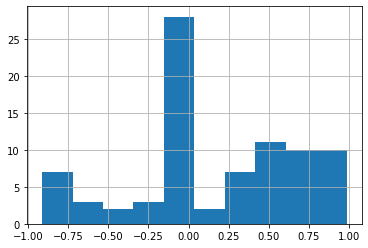

In [133]:
# Often the users at each end of this spectrum are quite different, lets see what our tweeters look like in general
data.sentiment.hist()

At a glance there are three different kinds of tweets here:
1. Negative tweets, these are likely complaints from vegans or complaints about vegans.
2. Neutral tweets, Most of the users appear to be neutral, this is usually a symptom that our sentiment analyser wasn't trained on the language it's predicting on, so is seeing words it's never classified before and tags them as neutral.
3. Positive tweets, these appear in abundance in comparison to negativity. Could this be a sign of positivity, marketing, bias?

On a hunch this grouping is quite naive. I could imagine a big difference in group 1:
* People complaining about vegans in a hateful way
* Vegans complaining about non-vegans in a hateful way
* Vegans complaining about vegan difficulties.

group 3 likely contains:
* Inflated self-promotion from vegan business owners
* Inflated promotion and feedback from large brands launching vegan products such as Greggs and the Vegan sausage roll.

These are all much larger project ideas, we don't even have a level of condience that any of these users are vegan.

### Most liked content
We have access to likes and retweets, let's check out what the most liked content is.

data.sort_values(by='sentiment', ascending=False).head()


<AxesSubplot:>

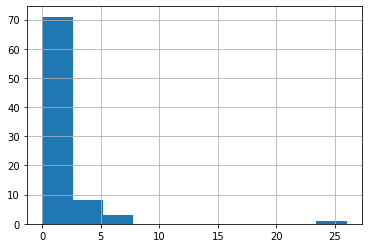

In [139]:
# A fairly familiar graph of likes being geometrically hard to gain, with outliers from "viral" tweets
data['public_metrics.like_count'].hist()

<AxesSubplot:>

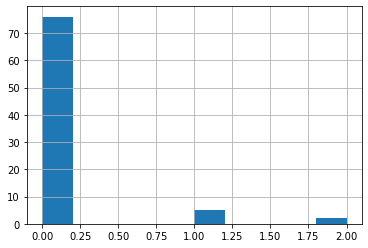

In [141]:
# And we see similar with retweets, even harder to come by as an echo of messaging rather than approval.
data['public_metrics.retweet_count'].hist()

In [143]:
# And how about the lowest sentiment?
data.sort_values(by='public_metrics.like_count', ascending=False).head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
18,1081701640015613952,2019-01-05 23:59:02+00:00,"Wow how did I miss this? ""Goodbye to the #Impo...",30940684,2009-04-13T19:44:23.000Z,Travis_Statham,"Brooklyn, NY",12026,NaN,26,2,0.4939
3,1081701855426723840,2019-01-05 23:59:54+00:00,Me: why don’t we go to this nice restaurant th...,1401405102,2013-05-04T04:54:06.000Z,jaunsin,USA,881,NaN,7,2,0.5023
32,1081701348679344128,2019-01-05 23:57:53+00:00,Day 5 #21DaySaladChallenge as usual I get lots...,2942409254,2014-12-25T02:26:44.000Z,KirkFitBeyond50,"Montclair, New Jersey",6364,NaN,6,1,-0.4466
64,1081700654089932801,2019-01-05 23:55:07+00:00,Why does Steve Charmley need to meet with #arr...,1581121290,2013-07-09T18:39:46.000Z,MaisyMooCow,UK -🐝North🐝,3054,NaN,6,1,-0.7003
61,1081700692534779904,2019-01-05 23:55:16+00:00,"Maybe if I tell Trader Joe’s I’m vegan, they’l...",960888155904688128,2018-02-06T14:49:23.000Z,aangelpz,"Los Angeles, CA",129,NaN,5,0,0.0000


In [144]:
mostLikedIndex = 18
print(data['id'][mostLikedIndex])
print(data['text'][mostLikedIndex])
print(data['sentiment'][mostLikedIndex])

1081701640015613952
Wow how did I miss this? "Goodbye to the #ImpossibleBurger" writes @BullCityBurger last October \n\n"It was never our intention to serve the Impossible Burger to have a vegan option." "ingredients beet burger, carrot, bean. Carbon footprint, cost, frozen package. https://t.co/LRyXAwQajG
0.4939


In [145]:
# And how about the lowest sentiment?
data.sort_values(by='public_metrics.retweet_count', ascending=False).head()

,id,created_at,text,author.id,author.created_at,author.username,author.location,author.public_metrics.followers_count,geo.full_name,public_metrics.like_count,public_metrics.retweet_count,sentiment
3,1081701855426723840,2019-01-05 23:59:54+00:00,Me: why don’t we go to this nice restaurant th...,1401405102,2013-05-04T04:54:06.000Z,jaunsin,USA,881,NaN,7,2,0.5023
18,1081701640015613952,2019-01-05 23:59:02+00:00,"Wow how did I miss this? ""Goodbye to the #Impo...",30940684,2009-04-13T19:44:23.000Z,Travis_Statham,"Brooklyn, NY",12026,NaN,26,2,0.4939
0,1081701878147280897,2019-01-05 23:59:59+00:00,Buffalo tempeh and cauliflower bites w vegan r...,88263960,2009-11-07T20:28:23.000Z,RunCrissieRun,Virginia,1349,NaN,1,1,0.0000
6,1081701817900298241,2019-01-05 23:59:45+00:00,All #babies whether it be #kittens or #chicks ...,1068696287384616963,2018-12-01T02:40:25.000Z,EarthlingSandy,Planet Earth,404,NaN,3,1,0.1880
32,1081701348679344128,2019-01-05 23:57:53+00:00,Day 5 #21DaySaladChallenge as usual I get lots...,2942409254,2014-12-25T02:26:44.000Z,KirkFitBeyond50,"Montclair, New Jersey",6364,NaN,6,1,-0.4466


In [146]:
mostRetweetedIndex = 3
print(data['id'][mostRetweetedIndex])
print(data['text'][mostRetweetedIndex])
print(data['sentiment'][mostRetweetedIndex])

1081701855426723840
Me: why don’t we go to this nice restaurant that’s vegan and very highly rated.\n\nMy family: let’s go to rib crib.
0.5023


### TODO Does sentiment correlate with success?
TODO - ADD COLOR CORRELATIONS TO PLOT
Now we have quantified sentiment, do high sentiment messages get engagement?

In [148]:
data[['author.public_metrics.followers_count','public_metrics.like_count','public_metrics.retweet_count','sentiment']].corr()

,author.public_metrics.followers_count,public_metrics.like_count,public_metrics.retweet_count,sentiment
author.public_metrics.followers_count,1.000000,0.286996,0.183470,-0.238987
public_metrics.like_count,0.286996,1.000000,0.714597,-0.017299
public_metrics.retweet_count,0.183470,0.714597,1.000000,-0.033836
sentiment,-0.238987,-0.017299,-0.033836,1.000000


My hunch is that as so many results have neutral sentiment this is probably shifting our correlations quite heavily, let's remove them for now.

In [152]:
data[['author.public_metrics.followers_count','public_metrics.like_count','public_metrics.retweet_count','sentiment']][data['sentiment'] != 0].corr()

,author.public_metrics.followers_count,public_metrics.like_count,public_metrics.retweet_count,sentiment
author.public_metrics.followers_count,1.000000,0.336881,0.224517,-0.292368
public_metrics.like_count,0.336881,1.000000,0.794539,-0.045073
public_metrics.retweet_count,0.224517,0.794539,1.000000,-0.050438
sentiment,-0.292368,-0.045073,-0.050438,1.000000


It looks like there is a light, negative correlation between the number of followers a user has. This seems to suggest the more followers a user has the more negative their language becomes. Again a further question here is that is this generalisable, and further, why does this happen?

There are also some more obvious connections. The more followers a user has, the more likes and retweets their content gets. Retweets and likes have a strong correlation as well.

## TODO: Most common words
By this point, we have noticed that our neutral sentiment tweets are a bit of a missed oppurtunity. We understand sentiment generally, but do not understand the terms within our topic area. The word "carnivore" might be usual, but in vegan circles it can be used in disgust or even as an insult, our sentiment analyzer doesn't understand this.

Let's take a look at what sorts of words show up in abundance in our content.

TODO:
* Get word counts
* Deal with stop words
* Find duplicates of words thorugh case sensitivity, spellcheck and stemming
* Make word clouds, demo wordcloud website too